In [1]:
from IPython.core.magic import register_cell_magic
@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)

In [2]:
import pandas as pd
import numpy as np
#data = pd.read_csv("C:/Users/DELL/Downloads/dataset_4_9_training.csv")
data = np.loadtxt("C:/Users/DELL/Downloads/dataset_4_9_training.csv", delimiter=",")

# extracting the first column which contains the labels
data_labels = data[:, :1].reshape(data.shape[0],)
# extracting all the columns but the first which are our features
data_features = data[:, 1:]
np.shape(data_features)


(6000, 3)

In [3]:
"""
### WRITE YOUR CODE BETWEEN THESE LINES - START
# Percentage of corpus considered for training
corp_perc = 4

# Calculating the total number of samples
corp_split = int(corp_perc * data.shape[0] // 100)

# Choosing random samples from data points corresponind to four and nine
four_indices = np.random.choice(np.arange(data.shape[0]//2), corp_split//2, replace=False)
nine_indices = np.random.choice(np.arange(data.shape[0]//2, data.shape[0]), corp_split//2, replace=False)
my_data_four = np.copy(data[four_indices])
my_data_nine = np.copy(data[nine_indices])

# Forming data set with samples of fours and nines
my_data = np.concatenate((my_data_four, my_data_nine))
test_perc = 5
semi_split = int(test_perc*my_data.shape[0]//200)

# Creating training and testing input dictionaries
training_input = {'A': my_data_four[:-semi_split, 1:], 'B': my_data_nine[:-semi_split, 1:]}
test_input = {'A': my_data_four[-semi_split:, 1:], 'B': my_data_nine[-semi_split:, 1:]}
testing_input = np.concatenate((my_data_four[-semi_split:, 1:], my_data_nine[-semi_split:, 1:]))
testing_labels = np.concatenate((my_data_four[-semi_split:, :1], my_data_nine[-semi_split:, :1]))

# Prepare the training and testing datasets
x_train = np.concatenate((training_input['A'], training_input['B']))
y_train = np.concatenate((np.zeros(len(training_input['A'])), np.ones(len(training_input['B']))))
x_test = testing_input
y_test = np.concatenate((np.zeros(len(test_input['A'])), np.ones(len(test_input['B']))))
"""

corp_perc = 80

# Calculating the total number of samples
corp_split = int(corp_perc * data.shape[0] // 100)

# Choosing random samples from data points corresponding to fours and nines
four_indices = np.random.choice(np.arange(data.shape[0]//2), corp_split//2, replace=False)
nine_indices = np.random.choice(np.arange(data.shape[0]//2, data.shape[0]), corp_split//2, replace=False)
my_data_four = np.copy(data[four_indices])
my_data_nine = np.copy(data[nine_indices])

# Forming data set with samples of fours and nines
my_data = np.concatenate((my_data_four, my_data_nine))

# Calculate the number of samples for testing (40%)
test_perc = 100 - corp_perc
semi_split = int(test_perc * my_data.shape[0] // 100)

# Creating training and testing input dictionaries
training_input = {'A': my_data_four[:-semi_split, 1:], 'B': my_data_nine[:-semi_split, 1:]}
test_input = {'A': my_data_four[-semi_split:, 1:], 'B': my_data_nine[-semi_split:, 1:]}
testing_input = np.concatenate((my_data_four[-semi_split:, 1:], my_data_nine[-semi_split:, 1:]))
testing_labels = np.concatenate((my_data_four[-semi_split:, :1], my_data_nine[-semi_split:, :1]))

# Prepare the training and testing datasets
x_train = np.concatenate((training_input['A'], training_input['B']))
y_train = np.concatenate((np.zeros(len(training_input['A'])), np.ones(len(training_input['B']))))
x_test = testing_input
y_test = np.concatenate((np.zeros(len(test_input['A'])), np.ones(len(test_input['B']))))



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from qiskit import *
from qiskit_ibm_provider import *
from qiskit_ibm_runtime import *
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from qiskit.primitives import Sampler, Estimator


sampler = Sampler()
estimator = Estimator()
import pandas as pd
import seaborn as sns
import time
import psutil
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.primitives import Sampler

In [5]:
%%write_and_run feature_map.py

import numpy as np
from qiskit import QuantumCircuit 
from qiskit.circuit import ParameterVector

# For Real amplitude Feature Mapping
def feature_map(num_qubits):
    rep = 2
    # Define a list of Parameter objects with length num_qubits*(rep+1)
    x = ParameterVector('x', length=num_qubits*(rep+1))

    # Create a custom quantum circuit
    custom_circ = QuantumCircuit(num_qubits)
    
    # Define the parametric form of the circuit
    p_i = 0
    for _ in range(rep):
        for i in range(num_qubits):
            # Apply a parametric rotation gate to each qubit
            custom_circ.ry(x[p_i], i)
            p_i += 1
        custom_circ.barrier()
        
        # Apply CNOT gates to create linear entanglement
        for i in range(num_qubits-1):
            custom_circ.cx(i, i+1)
        custom_circ.barrier()
        p_i = 0
    # Apply parametric rotation gates to each qubit again
    p_i = 0
    for i in range(num_qubits):
        custom_circ.ry(x[p_i], i)  
        p_i += 1
    
    return custom_circ, num_qubits


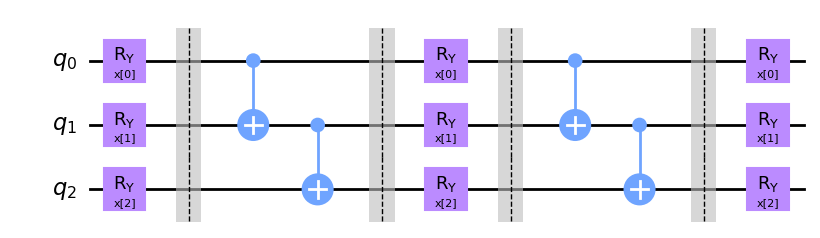

In [6]:

# Initialize the feature map
feature_map_circuit, num_qubits = feature_map(num_qubits=3)
feature_map_circuit.draw(output='mpl', style='clifford')

In [7]:
%%write_and_run variational_circuit.py

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import  RealAmplitudes, EfficientSU2, TwoLocal, NLocal
    
um_qubits
def variational_circuit(num_qubits):
    #num_qubits = num_features
    reps = 2  # Reduced repetitions
    x = ParameterVector('L', length=(num_qubits*(reps+1)*(reps+1)))
    var_circuit = QuantumCircuit(num_qubits)
    count = 0

    # Layered approach
    for _ in range(reps):
        # Apply single-qubit rotations
        for i in range(num_qubits):
            var_circuit.ry(x[count], i)
            var_circuit.rz(x[count + 1], i)
            count += 1

        # Linear entanglement
        for i in range(num_qubits - 1):
            var_circuit.cx(i, i + 1)
        
    # Final rotation layer
    for i in range(num_qubits):
        var_circuit.ry(x[count], i)
        var_circuit.rz(x[count + 1], i)
        count += 1
    
    return var_circuit, num_qubits

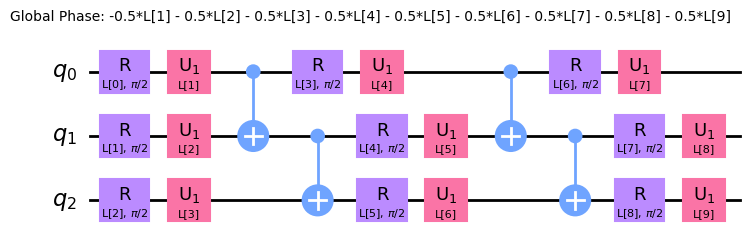

In [8]:
# Initialize the variational circuit
variational_circuit_circuit, num_qubits = variational_circuit(num_qubits=3)
variational_circuit_circuit.decompose().draw(output='mpl', style='clifford')

In [9]:

cls_opt = COBYLA(maxiter=60, tol=0.001)

In [43]:
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit import *
# construct QNN with the QNNCircuit's default ZZFeatureMap feature map and RealAmplitudes ansatz.
qc = QNNCircuit(num_qubits=num_qubits, feature_map = feature_map_circuit, ansatz= variational_circuit_circuit)
qc.decompose().draw("mpl", style="clifford")
qc.draw('mpl')

def parity(x):
    return f"{bin(x)}".count("1") % 2
sampler_qnn = SamplerQNN(
    circuit=qc,
    sampler=sampler,
    interpret = parity,
    output_shape = 2,
)                    #input_gradients=True)


In [44]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals))
    , objective_func_vals)
    plt.show()

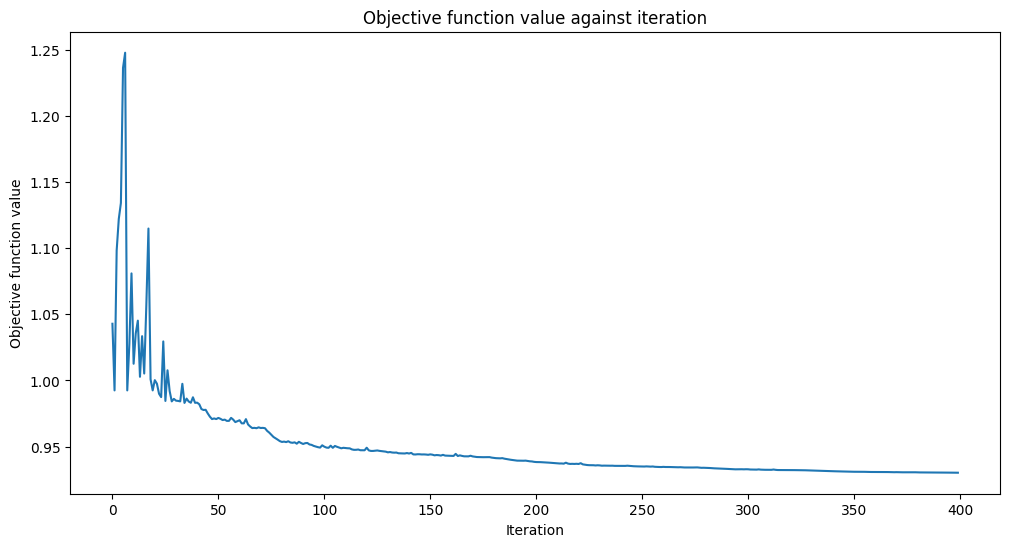

Training time: 3736 seconds


In [45]:
# construct neural network classifier
estimator_classifier = NeuralNetworkClassifier(
    sampler_qnn, 
    callback=callback_graph, 
    loss='cross_entropy',
    one_hot = True,
    optimizer=cls_opt,
)      

# clear objective value history
objective_func_vals = []
start = time.time()
estimator_classifier.fit(x_train, y_train)
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

In [46]:
train_score_q2_ra = estimator_classifier.score(x_train, y_train)
test_score_q2_ra = estimator_classifier.score(x_test, y_test)

print(f"EstimatorQNN on the training dataset using TwoLocal: {train_score_q2_ra:.2f}")
print(f"EstimatorQNN on the test dataset using TwoLocal:     {test_score_q2_ra:.2f}")

EstimatorQNN on the training dataset using TwoLocal: 0.74
EstimatorQNN on the test dataset using TwoLocal:     0.73


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

result = estimator_classifier.predict(x_test)

# Calculate accuracy and F1 score
estimator_qnn_score = accuracy_score(y_test, result) * 100
f1 = f1_score(y_test, result, average='weighted') * 100
print('Accuracy =', estimator_qnn_score)
print('F1 Score =', f1)


Accuracy = 73.22916666666667
F1 Score = 73.21867615244251


In [15]:
feature_map_circuit.depth()

7

In [16]:
variational_circuit_circuit.decompose().depth()

10

In [ ]:
sampler_qnn_input = algorithm_globals.random.random(sampler_qnn.num_inputs)
sampler_qnn_weights = algorithm_globals.random.random(sampler_qnn.num_weights)